# Figs of Horizontal Turner Angles
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Global annual-mean](#first-bullet)
* [Basin-wide annual-mean](#second-bullet)
* [Global timeseries?](#third-bullet)

> Note: the time dimension is only for first 6 months of CESM data

In [1]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
import pop_tools
import gcsfs

In [2]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml"
cat = open_catalog(url)
ds  = cat["CESM_POP_hires_control"].to_dask()

In [4]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

ta_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/ta_clim.zarr'))
ta = ta_clim.ta_clim

In [6]:
#making it go to -90,90
ta = ta/2

# 1) Global annual-mean <a class='anchor' id='first-bullet'> </a>

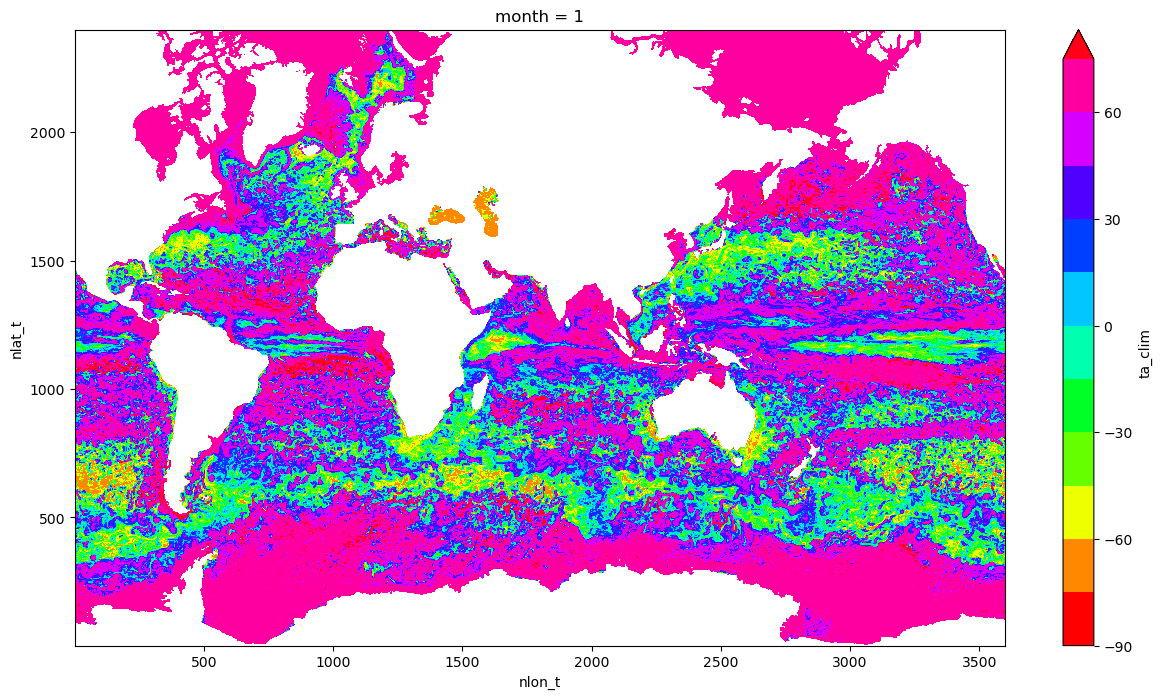

In [7]:
#global turner angle
fig, ax = plt.subplots(figsize=(15,8))
ta.isel(month=0).plot.contourf(levels=np.arange(-90, 90, 15), cmap='hsv');

# 2) Basin-wide annual-mean <a class='anchor' id='second-bullet'> </a>